classify emails using LLM

In [ ]:


# Import Libraries
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

#  Load and Prepare Dataset
df = pd.read_csv("spam.csv", encoding="latin-1")[["text", "target"]]
df = df.sample(n=100, random_state=42).reset_index(drop=True)  # sample 100 for performance
df["text"] = df["text"].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()

# Load Zero-Shot Classification Pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define Candidate Labels
labels = ["spam", "ham"]

# Apply Model to Classify Emails
predictions = []
for text in tqdm(df["text"]):
    result = classifier(text[:512], candidate_labels=labels)
    predictions.append(result["labels"][0])  # top label

# Store Predictions
df["predicted_label"] = predictions

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

df["target"] = df["target"].str.lower()
print("Accuracy:", accuracy_score(df["target"], df["predicted_label"]))
print(classification_report(df["target"], df["predicted_label"]))
df.head()

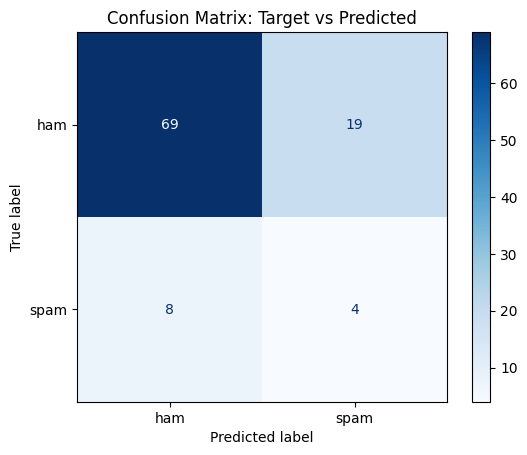

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df["target"], df["predicted_label"], labels=["ham", "spam"])

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Target vs Predicted")
plt.show()